# Support Vector Machine (SVM)

* É um modelo de classificação que considera os pontos que estão no extremo dos dados, de classes distintas e que estão mais próximos entre si, e utilizar esses pontos para determinar um **hiperplano** capaz de separar as classes;

<p align="center">
    <img src="image.png">
</p>

* Quanto maior a margem, melhor, mais otimizado;

* Este modelo pode ser aplicado em dados linearmente separáveis e não linearmente separáveis:
    - Ele considera as dimensões dos dados;
    - O SVM utiliza funções de *kernel* e encontra a melhor dimensão para traçar o hiperplano que classifica os dados;

In [3]:
import sklearn
from sklearn.datasets import load_iris

X, y = load_iris(as_frame=True, return_X_y=True)

In [4]:
X = X.loc[y.isin([0,1]), ['petal length (cm)', 'petal width (cm)']]
y = y[y.isin([0,1])]

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

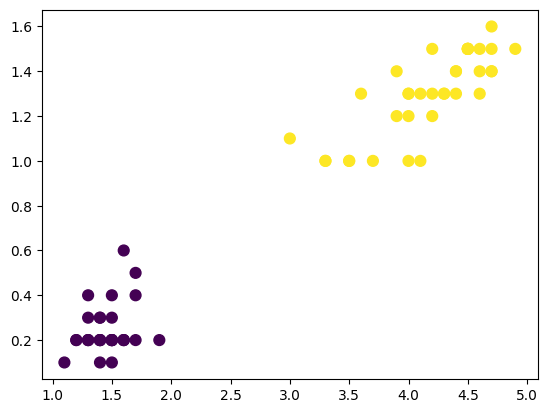

In [7]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()

ax.scatter(X_train['petal length (cm)'], X_train['petal width (cm)'], c=y_train, s=60)

plt.show()

In [11]:
from sklearn.svm import SVC

clf = SVC(kernel='linear').fit(X_train, y_train)

In [15]:
clf.coef_

# coeficientes w_1 e w_2

array([[1.1769056 , 0.78337144]])

In [16]:
w1 = clf.coef_[0][0]
w2 = clf.coef_[0][1]

In [19]:
w0 = clf.intercept_

* Agora precisamos traçar uma reta com equação $y = ax + b$

* Para considerar os dois coeficientes, temos:
    - w1.X_train[0] + w2.X_train[1] + w0 = 0
    - w1.X_train['petal width (cm)'] + w2.X_train['petal length (cm)'] + w0 = 0
    - Sendo x = X_train['petal width (cm)'] e y = X_train['petal length (cm)']:
        - w1.x + w2.y + w0 = 0
        - w2.y = -w1.x - w0
        - y = -(w1.x + w0)/w2

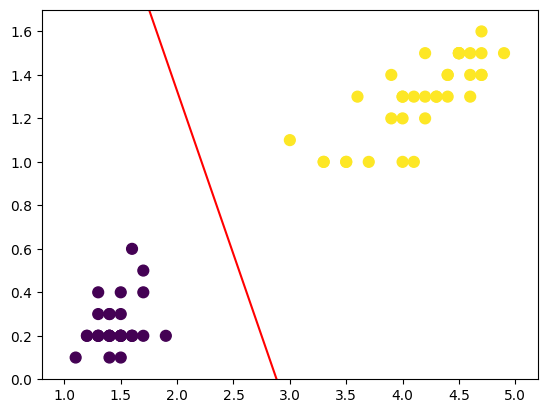

In [22]:
fig, ax = plt.subplots()

ax.scatter(X_train['petal length (cm)'], X_train['petal width (cm)'], c=y_train, s=60)

x = np.linspace(1, 5, 100)
y = -(w1*x + w0)/w2
ax.plot(x, y, '-r')

ax.set(ylim=(0, 1.7))

plt.show()

In [23]:
clf.support_vectors_

array([[1.9, 0.2],
       [1.7, 0.5],
       [3. , 1.1]])

In [24]:
clf.support_vectors_[:, 0]

array([1.9, 1.7, 3. ])

In [25]:
clf.support_vectors_[:, 1]

array([0.2, 0.5, 1.1])

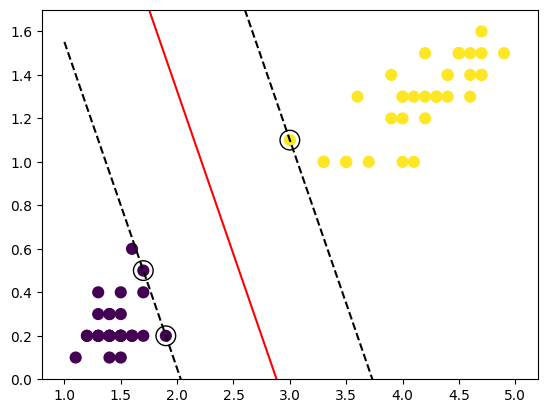

In [31]:
fig, ax = plt.subplots()

ax.scatter(X_train['petal length (cm)'], X_train['petal width (cm)'], c=y_train, s=60)

x = np.linspace(1, 5, 100)
y = -(w1*x + w0)/w2
ax.plot(x, y, '-r')

y2 = -(w1*x + w0 + 1)/w2
ax.plot(x, y2, '--k')

y3 = -(w1*x + w0 - 1)/w2
ax.plot(x, y3, '--k')

ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=200, facecolors='none', edgecolors='k')

ax.set(ylim=(0, 1.7))

plt.show()

* Os pontos circulados são os vetores de suporte para encontrar a reta otimizada que classifica os dados;
* As retas pretas definem as margens, enquanto a reta vermelha é a reta encontrada pelo modelo SVM para classificar os dados.

In [32]:
X, y = load_iris(as_frame=True, return_X_y=True)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [35]:
clf2 = SVC().fit(X_train, y_train)

In [37]:
y_pred = clf2.predict(X_test)

In [38]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[19,  0,  0],
       [ 0, 15,  0],
       [ 0,  0, 16]], dtype=int64)